In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boeing-production/Digital_Oversight_Pilot.xlsx


In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/kaggle/input/boeing-production/.xlsx")

# Check the data
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/boeing-production/.xlsx'

In [7]:
import pandas as pd

# Create the dataset directly in code
data = {
    "Year": [2021, 2022, 2023, 2024, 2025],
    "PlannedOutput": [264, 372, 456, 456, 456],
    "ActualOutput": [263, 387, 396, 265, 45],
    "Orders": [395, 626, 1075, 236, 558],
    "Backlog": [3414, 3653, 4332, 4303, 4816],
    "ProductionGap": [1, -15, 60, 191, 411],
    "Backlog_Change_Pct": [0, 0.07, 0.186, -0.007, 0.119],
    "NetLoss": [-459.2, -546, -633, -476.9, -724.3],
    "ForwardLosses": [-227.3, 0, 0, -217, -585],
    "ExcessCapacityCost": [-206.7, 0, 0, -70, -55]
}

# Load into a DataFrame
df = pd.DataFrame(data)

# Add Risk_Level column (predictive flag)
df['Risk_Level'] = df.apply(lambda row: 'High Risk' if (row['ProductionGap'] > 100 and row['Backlog_Change_Pct'] > 0.1) else 'Normal', axis=1)

# Display the DataFrame
df


,Year,PlannedOutput,ActualOutput,Orders,Backlog,ProductionGap,Backlog_Change_Pct,NetLoss,ForwardLosses,ExcessCapacityCost,Risk_Level
0,2021,264,263,395,3414,1,0.000,-459.2,-227.3,-206.7,Normal
1,2022,372,387,626,3653,-15,0.070,-546.0,0.0,0.0,Normal
2,2023,456,396,1075,4332,60,0.186,-633.0,0.0,0.0,Normal
3,2024,456,265,236,4303,191,-0.007,-476.9,-217.0,-70.0,Normal
4,2025,456,45,558,4816,411,0.119,-724.3,-585.0,-55.0,High Risk


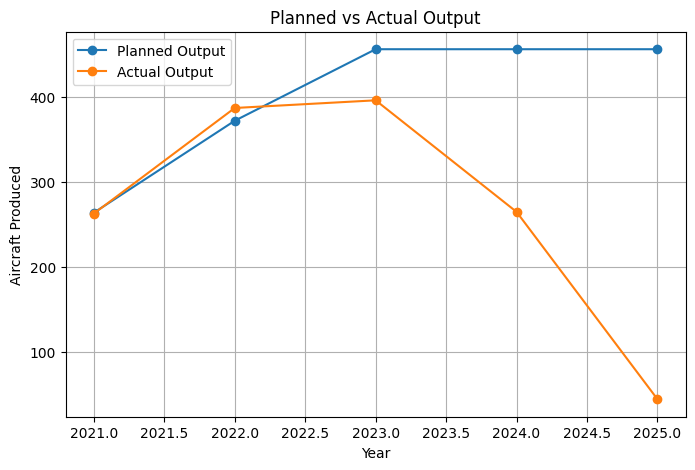

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(df['Year'], df['PlannedOutput'], marker='o', label='Planned Output')
plt.plot(df['Year'], df['ActualOutput'], marker='o', label='Actual Output')
plt.title('Planned vs Actual Output')
plt.xlabel('Year')
plt.ylabel('Aircraft Produced')
plt.legend()
plt.grid(True)
plt.show()


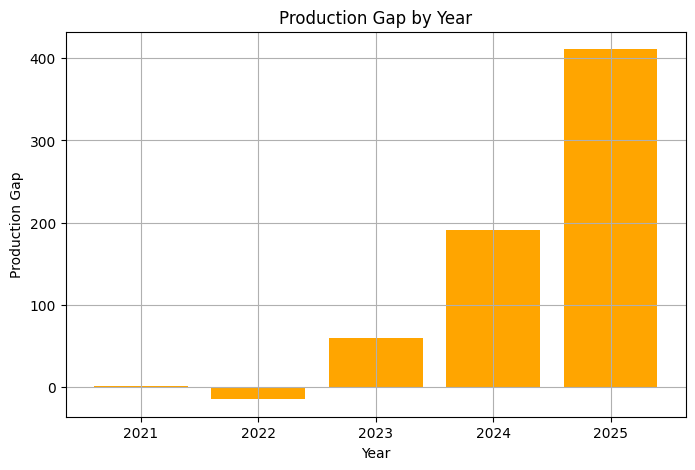

In [9]:
plt.figure(figsize=(8,5))
plt.bar(df['Year'], df['ProductionGap'], color='orange')
plt.title('Production Gap by Year')
plt.xlabel('Year')
plt.ylabel('Production Gap')
plt.grid(True)
plt.show()


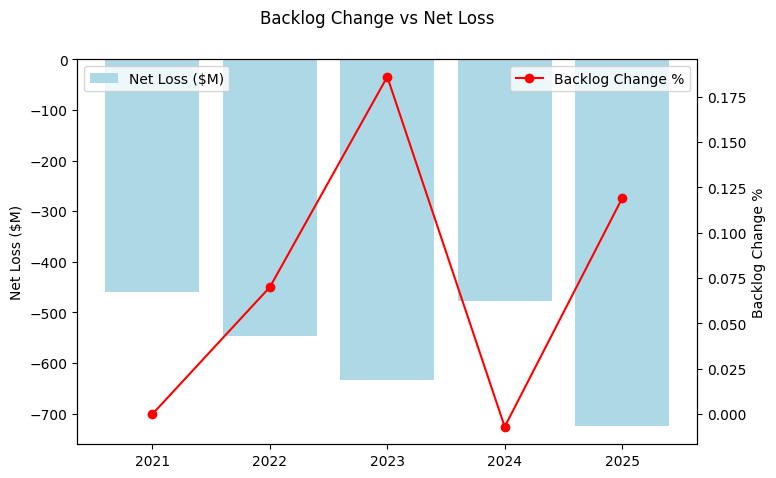

In [10]:
fig, ax1 = plt.subplots(figsize=(8,5))

ax1.bar(df['Year'], df['NetLoss'], color='lightblue', label='Net Loss ($M)')
ax1.set_ylabel('Net Loss ($M)')

ax2 = ax1.twinx()
ax2.plot(df['Year'], df['Backlog_Change_Pct'], color='red', marker='o', label='Backlog Change %')
ax2.set_ylabel('Backlog Change %')

fig.suptitle('Backlog Change vs Net Loss')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


In [11]:
high_risk_years = df[df['Risk_Level'] == 'High Risk']['Year'].tolist()
print("High Risk Years:", high_risk_years)


High Risk Years: [2025]


In [12]:
# Independent variable
X = df[['Year']]  # 2D array required for scikit-learn

# Dependent variable
y = df['ProductionGap']


In [13]:
print(X)
print(y)


   Year
0  2021
1  2022
2  2023
3  2024
4  2025
0      1
1    -15
2     60
3    191
4    411
Name: ProductionGap, dtype: int64


In [15]:
# Select input (X) and output (y)
X = df[['Year']]          # Note: double brackets to make it 2D
y = df['ProductionGap']   # Single column (1D)


In [16]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Check predictions for existing years
df['Predicted_Gap'] = model.predict(X)
df[['Year', 'ProductionGap', 'Predicted_Gap']]


,Year,ProductionGap,Predicted_Gap
0,2021,1,-75.6
1,2022,-15,27.0
2,2023,60,129.6
3,2024,191,232.2
4,2025,411,334.8


In [17]:
import pandas as pd

future_years = pd.DataFrame({'Year': [2026, 2027, 2028]})
future_years['Predicted_Gap'] = model.predict(future_years[['Year']])
future_years


,Year,Predicted_Gap
0,2026,437.4
1,2027,540.0
2,2028,642.6


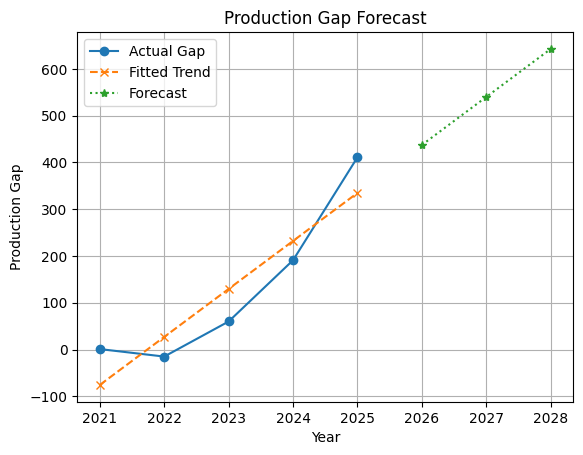

In [18]:
import matplotlib.pyplot as plt

plt.plot(df['Year'], df['ProductionGap'], marker='o', label='Actual Gap')
plt.plot(df['Year'], df['Predicted_Gap'], linestyle='--', marker='x', label='Fitted Trend')
plt.plot(future_years['Year'], future_years['Predicted_Gap'], linestyle=':', marker='*', label='Forecast')
plt.title('Production Gap Forecast')
plt.xlabel('Year')
plt.ylabel('Production Gap')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from graphviz import Digraph

dot = Digraph(comment='Digital Production Oversight')

# Nodes
dot.node('A', 'Shop Floor')
dot.node('B', 'Supplier Telemetry')
dot.node('C', 'Predictive Analytics')
dot.node('D', 'Unified Dashboard')
dot.node('E', 'Decision-Making')

# Edges
dot.edge('A', 'B', 'real-time data')
dot.edge('B', 'C', 'live updates')
dot.edge('C', 'D', 'predictions')
dot.edge('D', 'E', 'insights')
dot.edge('B', 'C', 'supplier feedback', constraint='false')  # optional feedback

dot.render('/mnt/data/oversight_flow_diagram', format='png', view=True)


In [22]:
def risk_level(gap):
    if gap > 300:
        return "High"
    elif gap > 100:
        return "Medium"
    else:
        return "Low"

df['Risk_Level'] = df['Predicted_Gap'].apply(risk_level)


In [23]:
print(df[['Year', 'ProductionGap', 'Predicted_Gap', 'Risk_Level']])


   Year  ProductionGap  Predicted_Gap Risk_Level
0  2021              1          -75.6        Low
1  2022            -15           27.0        Low
2  2023             60          129.6     Medium
3  2024            191          232.2     Medium
4  2025            411          334.8       High


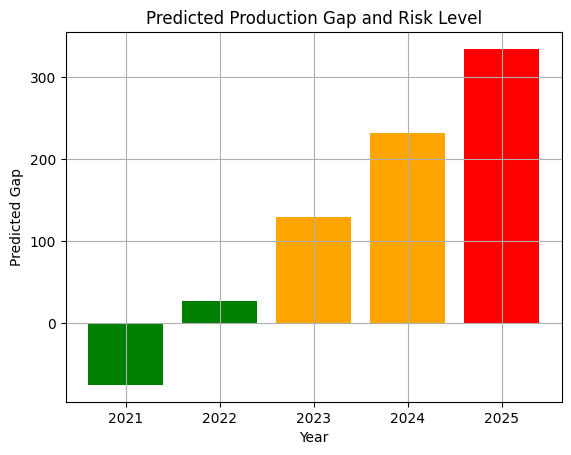

In [24]:
import matplotlib.pyplot as plt

plt.bar(df['Year'], df['Predicted_Gap'], color=df['Risk_Level'].map({'Low':'green','Medium':'orange','High':'red'}))
plt.title('Predicted Production Gap and Risk Level')
plt.xlabel('Year')
plt.ylabel('Predicted Gap')
plt.grid(True)
plt.show()


Interpretation:

The model shows a rising ProductionGap trend through 2028.

High-risk years (2025–2028) indicate sustained supplier or production issues.

Digital Oversight can help intervene early by integrating real-time telemetry and supplier data.

In [26]:
# Combine actual and future forecast data
future_years['ProductionGap'] = None  # No actual data for future
future_years['Risk_Level'] = future_years['Predicted_Gap'].apply(lambda x: 'High' if x > 300 else ('Medium' if x > 100 else 'Low'))

# Combine both
combined_df = pd.concat([df, future_years], ignore_index=True)


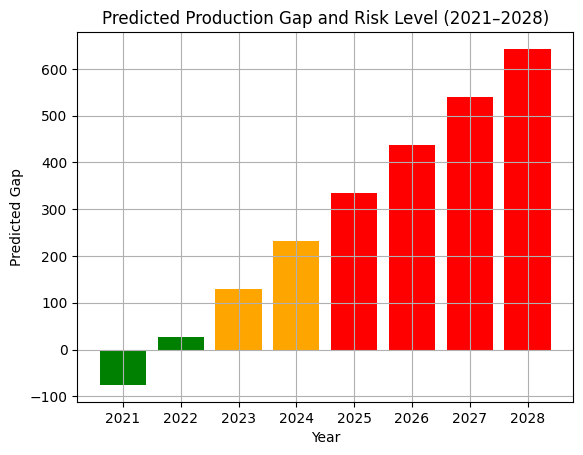

In [27]:
plt.bar(
    combined_df['Year'], 
    combined_df['Predicted_Gap'], 
    color=combined_df['Risk_Level'].map({'Low':'green','Medium':'orange','High':'red'})
)
plt.title('Predicted Production Gap and Risk Level (2021–2028)')
plt.xlabel('Year')
plt.ylabel('Predicted Gap')
plt.grid(True)
plt.show()


In [29]:
import plotly.express as px
fig = px.bar(combined_df, x='Year', y='Predicted_Gap', color='Risk_Level',
             title='Predicted Production Gap & Risk Level')
fig.show()


In [31]:
# run in your Kaggle notebook
combined_df.to_csv("Digital_Oversight_Forecast.csv", index=False)
